In [2]:
from adiaframe.utils import *
from adiaframe import Hamiltonian

In [3]:
import pennylane as qml
import numpy as np

from adiaframe.utils import xz_fam_code_add, xz_fam_code_to_pstr, commute_reggio


In [89]:
class PFrame:
    # Schmitz et al, 
    # Optimization at the Interface of Unitary and 
    # Non-unitary Quantum Operations in PCOAST,
    
    def __init__(self, n:int):
        assert n>0 and isinstance(n, int), "n must be a positive integer."
        self.n = n
        num = 1
        frame = []
        for i in range(n):
            frame.append([[0, num], [num, 0]])
            num *= 2
        self.frame = frame
        self.wire_depth = self.n * [0]
        self.gate_log = []
    def local_supp(self, p, i):
        r = self.frame[i]
        s, sd = r
        a  = not commute_reggio(s, p)
        b  = not commute_reggio(sd, p)
        return a, b
    def supp(self, p):
        num = 0
        for i in  range(self.n):
            a, b = self.local_supp(p, i)
            num+= int(a|b)
        return num
        
    @property
    def str_frame(self):
        frame = []
        for r in self.frame:
            si, sdi = r
            frame.append([xz_fam_code_to_pstr(si,self.n), xz_fam_code_to_pstr(sdi,self.n)])
        return frame
    def reset_gate_log(self):
        self.gate_log = []
    def to_pennylane_circuit(self, replace_rz:None):
        pass
    def CX(self, i, j):
        s_i, sd_i = self.frame[i]
        s_j, sd_j = self.frame[j]
        
        s_j_new = xz_fam_code_add(s_j, s_i)
        sd_i_new = xz_fam_code_add(sd_i, sd_j)
        self.frame[i] = [s_i, sd_i_new]
        self.frame[j] = [s_j_new, sd_j]
        
        self.gate_log.append(["cx", i, j])
        self.wire_depth[i] += 1
        self.wire_depth[j] += 1
    def SWAP(self, i, j):
        nr = self.frame[j]
        self.frame[j] = self.frame[i]
        self.frame[i] = nr
        
        self.gate_log.append(["swap", i, j])
        self.wire_depth[i] += 1
        self.wire_depth[j] += 1
    def H(self, i):
        s_i, sd_i = self.frame[i]
        self.frame[i] = [sd_i, s_i]
        self.gate_log.append(["h", i])
    def S(self, i):
        s_i, sd_i = self.frame[i]
        self.frame[i] = [s_i,  xz_fam_code_add(s_i, sd_i)]
        self.gate_log.append(["s", i])
    def Sd(self, i):
        s_i, sd_i = self.frame[i]
        self.frame[i] = [s_i,  xz_fam_code_add(s_i, sd_i)]
        self.gate_log.append(["sd", i])
    
    def U_mark(self, i):
        self.gate_log.append(["um", i])

In [ ]:
# 
def pfg_ugs(h:Hamiltonian):
    c_elemnt = []
    poly = h.xz_family
    ham = []
    
    # Frame
    pframe = PFrame(h.qubit_num)
    while len(ham) !=:
        minsup  = N
        ham_min = []
        cos = 1.1
        gmin =
        
        for p in ham:
            sup =  pframe.supp(p)
            if sup == 1:
                pass
            elif sup == minsup:
                pass
            elif sup < minsup:
                ham_min = [p]
                minsup = sup
        for p in ham_min:
            for g in gates:
                pf_new  = p_frame.apply(g)
                if pf_new.supp(p) < cost:
                    g_min = g
                    cost = pf_new.supp(p)
        c_element.append(g_min)
        

In [90]:
# Z family : first consideration.
# 1. start 

---

In [111]:
import pennylane as qml


In [170]:
# Just basic Trotterization
def evolve_circuit(pstr, on_wire:int, 
                   coeff:float, t:float, imaginary=False):
    """Return P evolution of exp(-i *t * coeff * P) or exp(- t * coeff*P)
    if `imaginary` is `True`.

    Args:
        pstr (_type_): Pauli string
        on_wire (int): Position of rotation gate
        coeff (float): Coefficient of Pauli term
        t (float): time
        imaginary (bool, optional): Evolution type REAL or IMAGINARY. Defaults to False.
    """
    act_wires=[]
    #basis_transform
    for i, s in enumerate(pstr):
        if s == "I":
            continue
        else: 
            act_wires.append(i)
            if s=="X":
                qml.Hadamard(wires=i)
            elif s=="Y":
                qml.adjoint(qml.S(wires=i))
                qml.Hadamard(wires=i)
    
    # CNOT
    for ai in act_wires:
        if on_wire == ai:
            continue
        qml.CNOT(wires=[ai, on_wire])
    if imaginary:
        dtau = t
        gamma = coeff
        phi = 2*np.arccos(np.exp(-2*gamma*dtau))
        qml.ctrl(qml.RX, on_wire)(phi, wires=len(pstr))
    else:
        phi = coeff * t
        qml.RZ(phi, wires=on_wire, id=pstr)
    
    # CNOT
    for ai in reversed(act_wires):
        if on_wire == ai:
            continue
        qml.CNOT(wires=[ai, on_wire])
    # Reverse
    for i, s in enumerate(pstr):
        if s == "I" or s=="Z":
            continue
        elif s=="X":
            qml.Hadamard(wires=i)
        elif s=="Y":
            qml.Hadamard(wires=i)
            qml.S(wires=i)
            
    

In [171]:
import pennylane as qml

In [172]:
qubits = 10
dev = qml.device('default.qubit', wires=qubits, shots=1000)

In [173]:
pstr_to_xz_fam_code("IXZXYZYYXX")

(367, 188)

In [176]:
@qml.qnode(dev)
def my_quantum_function():
    evolve_circuit("IXZXYZYYXX", 6, 0.42, 0.1, imaginary=True)
    return qml.expval(qml.PauliZ(1))

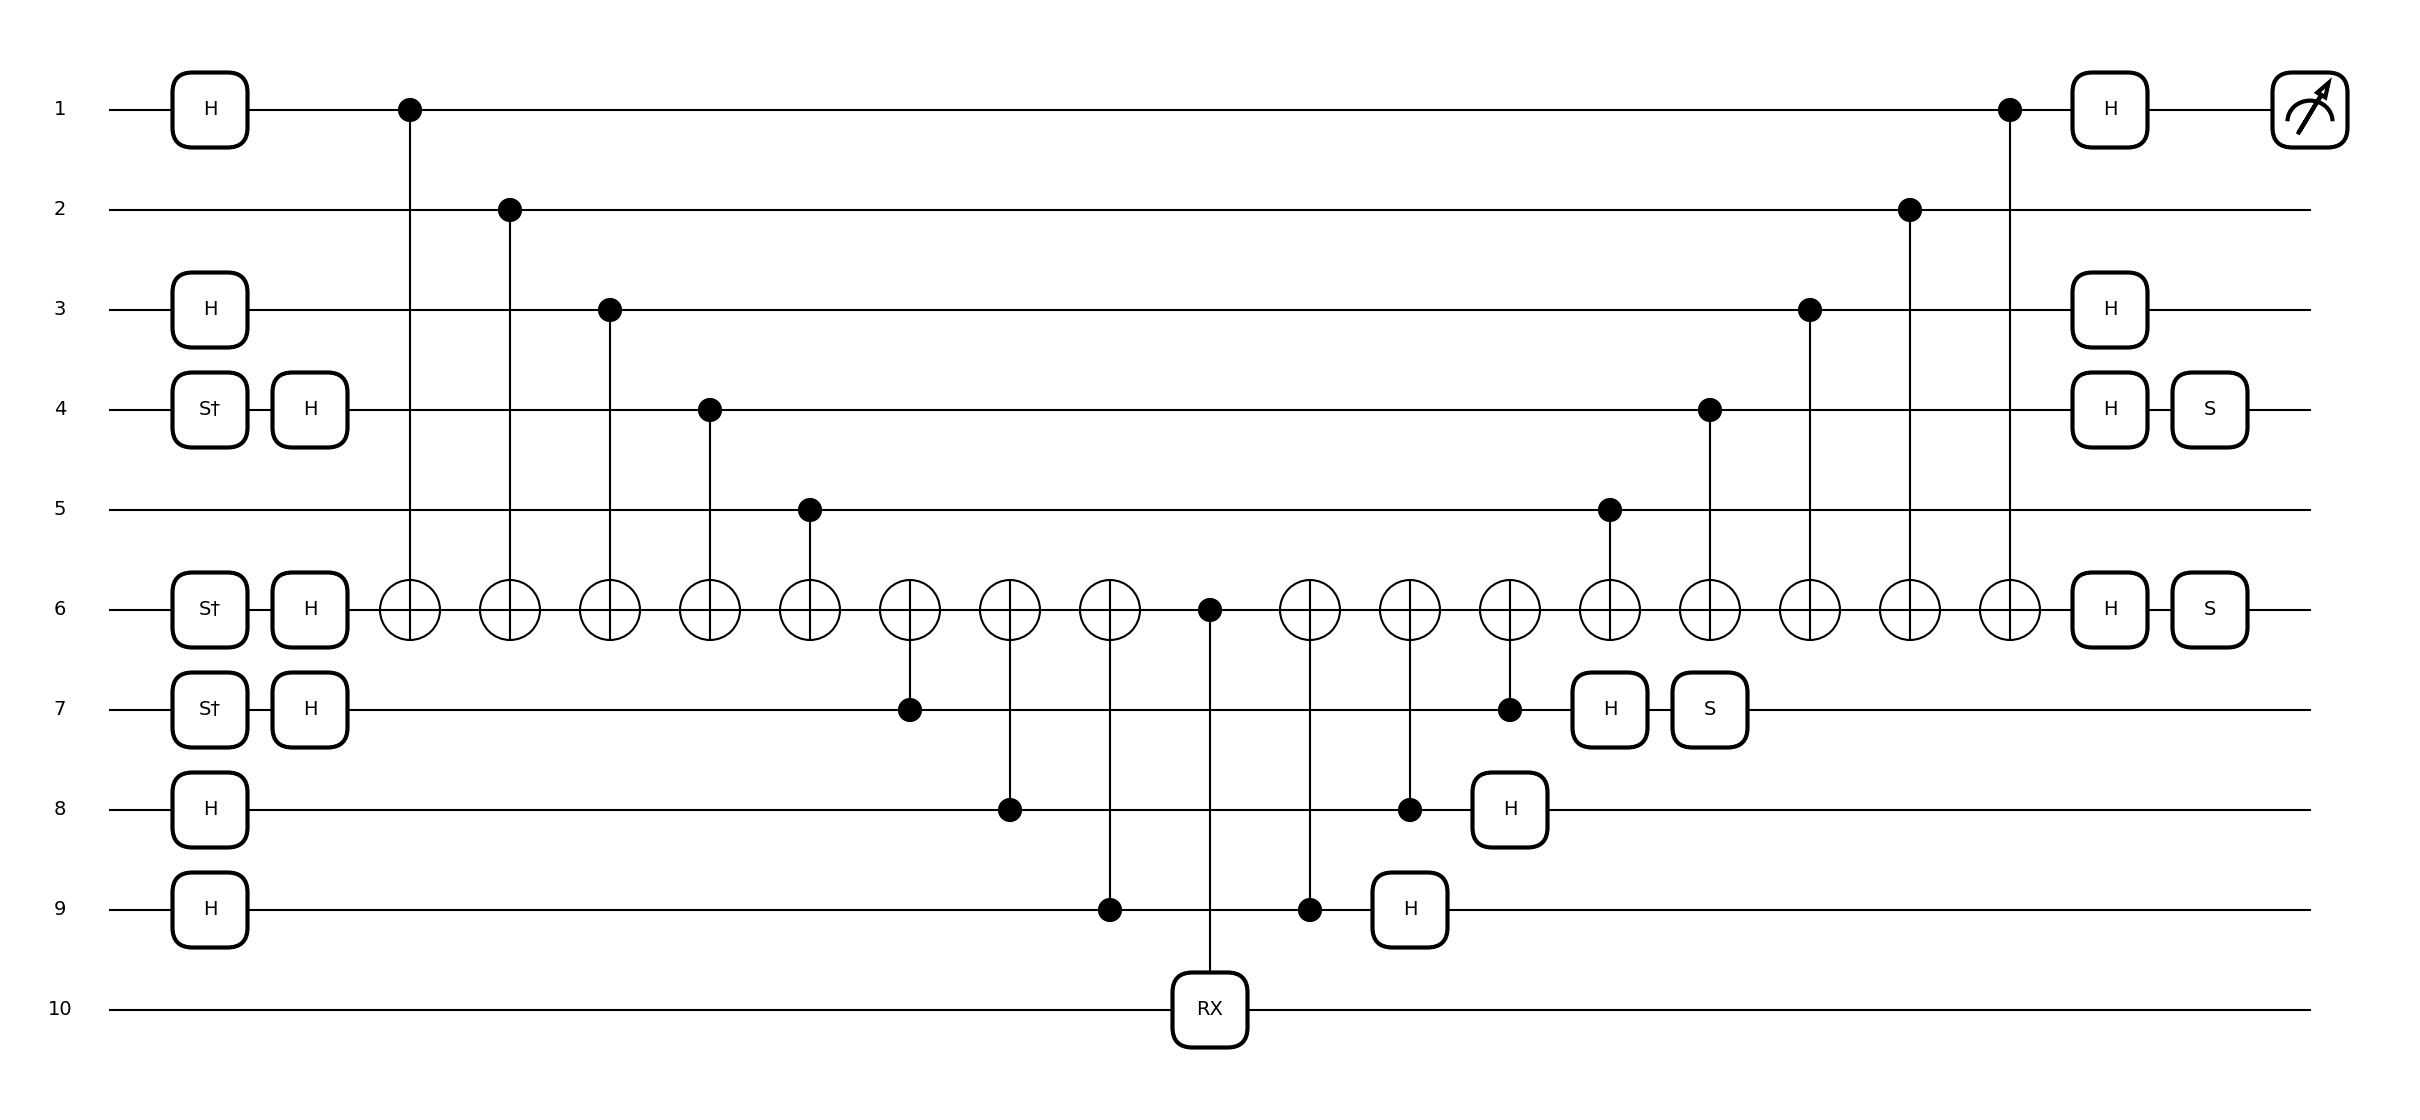

In [177]:
fig, ax = qml.draw_mpl(my_quantum_function)()